# Creating a Multiple Linear Regression Model for pH (Validation data)

In [1]:
#Reading in packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sma
import statsmodels as sm
import pylab as py
import scipy.stats as stats
import scipy as sp
import statsmodels.formula.api as smf
import sklearn
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from plotnine import *
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from statsmodels.genmod.generalized_linear_model import GLM
from scipy.stats import spearmanr

In [2]:
#Reading in dataset
validation = pd.read_csv("/Users/madisongosnell/Desktop/MSA Coding /Individual Project/wine_validation.csv")

#Changing column names in validation dataset
validation.columns = [col.replace(' ', '_') for col in validation.columns]

In [3]:
#Defining the model chosen from train data
model_mlr = smf.ols(
    "pH ~ fixed_acidity + citric_acid + residual_sugar + chlorides + total_sulfur_dioxide + sulphates + alcohol + Wine_Type", 
    data = validation).fit()
model_mlr.summary()

#Not quite as good of a model as training data

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pH   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     44.52
Date:                Mon, 22 Sep 2025   Prob (F-statistic):           7.99e-57
Time:                        15:16:53   Log-Likelihood:                 450.19
No. Observations:                 650   AIC:                            -882.4
Df Residuals:                     641   BIC:                            -842.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.6641      0.078     47.122      0.000       3.511       3.817
Wine_Type[T.White]      -0.2047      0.022     -9.157      0.000      -0.249      -0.161
fixed_acidity           -0.0504      0.005    -10.492      0.000      -0.060      -0.041
citric_acid             -0.0517      0.041     -1.257      0.209      -0.132       0.029
residual_sugar          -0.0057      0.001     -4.667      0.000      -0.008      -0.003
chlorides               -0.2625      0.234     -1.123      0.262      -0.722       0.197
total_sulfur_dioxide     0.0005      0.000      3.517      0.000       0.000       0.001
sulphates                0.1589      0.042      3.751      0.000       0.076       0.242
alcohol                 -0.0010      0.005     -0.188      0.851      -0.011       0.009
==============================================================================
Omnibus:                       17.163   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.841
Skew:                           0.343   Prob(JB):                     8.10e-05
Kurtosis:                       3.474   Cond. No.                     6.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

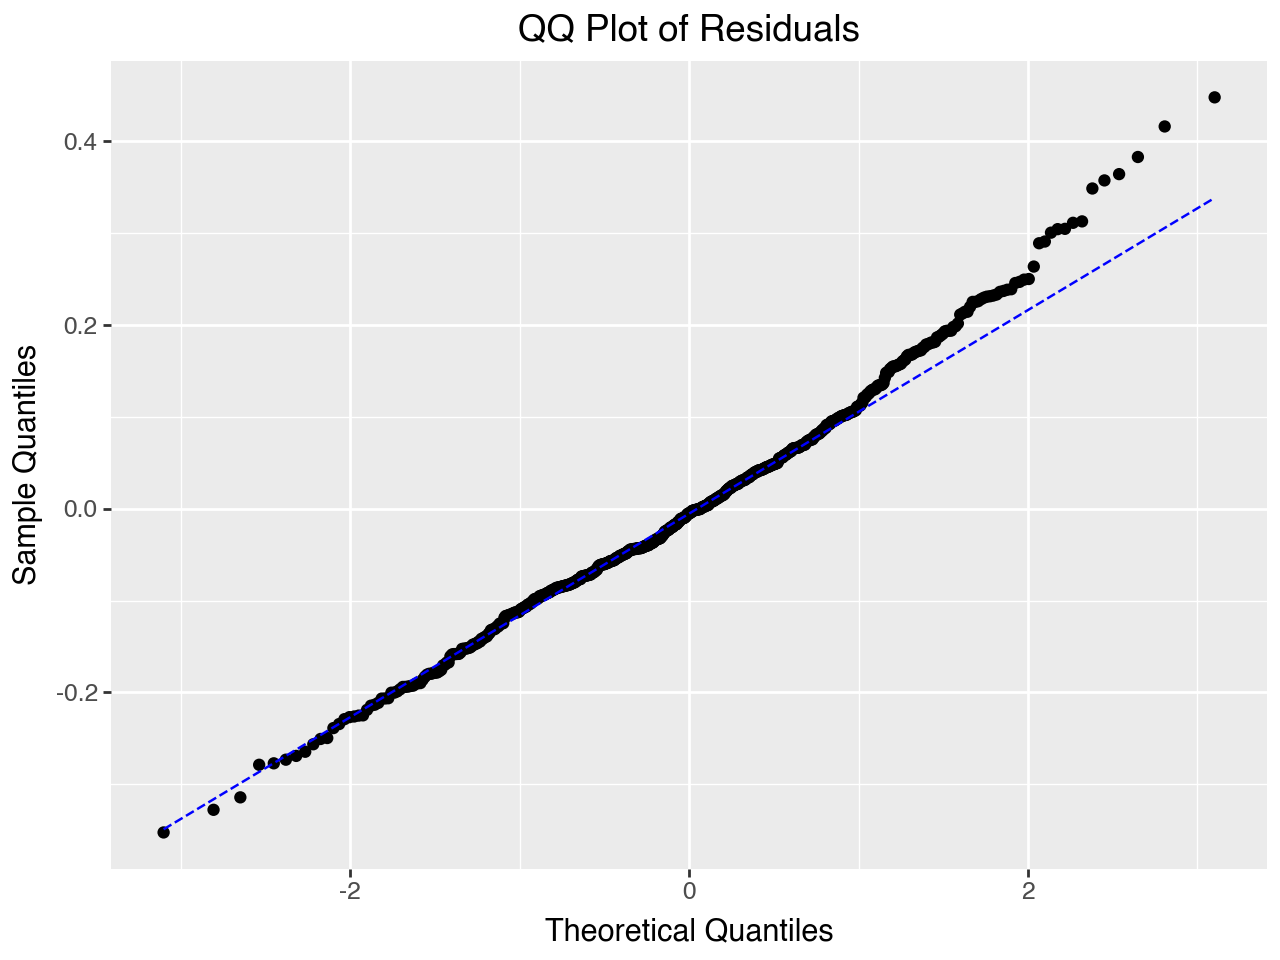

P-value is: 0.000724


In [4]:
#Need to test our assumptions for the model

#First assumption - Check for Normality
#Identifying the model residuals
validation['pred_mlr'] = model_mlr.predict()
validation['resid_mlr'] = model_mlr.resid

p = (
   ggplot(validation, aes(sample="resid_mlr")) +
   geom_qq() +
   geom_qq_line(color="blue", linetype="dashed") +
   labs(title="QQ Plot of Residuals", x="Theoretical Quantiles", y="Sample Quantiles")
)
p.show()

#Looks relatively Normal, but Leptokurtic

#Check Normality with Shapiro-Wilk Test
shap_test = sp.stats.shapiro(model_mlr.resid)
print(f"P-value is: {shap_test.pvalue:4f}")

#P-value is nearly zero indicates our residuals are not normal

In [5]:
#We will account for the Non-Normality by doing a log transformation 
#Doing a log transofrmation on pH
validation['log_pH'] = np.log(validation['pH'])

#Fitting new model with log(pH) as the response variable
model_mlr = smf.ols(
    "log_pH ~ fixed_acidity + citric_acid + residual_sugar + chlorides + total_sulfur_dioxide + sulphates + alcohol + Wine_Type", 
    data = validation).fit()
model_mlr.summary()

#Adjusted R-squared stayed about the same
#Also checked multicollinearity in R - still not present

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log_pH   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     44.23
Date:                Mon, 22 Sep 2025   Prob (F-statistic):           1.67e-56
Time:                        15:16:53   Log-Likelihood:                 1208.6
No. Observations:                 650   AIC:                            -2399.
Df Residuals:                     641   BIC:                            -2359.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.3065      0.024     53.966      0.000       1.259       1.354
Wine_Type[T.White]      -0.0636      0.007     -9.142      0.000      -0.077      -0.050
fixed_acidity           -0.0156      0.001    -10.437      0.000      -0.019      -0.013
citric_acid             -0.0164      0.013     -1.280      0.201      -0.042       0.009
residual_sugar          -0.0018      0.000     -4.725      0.000      -0.003      -0.001
chlorides               -0.0815      0.073     -1.119      0.263      -0.224       0.061
total_sulfur_dioxide     0.0001   4.17e-05      3.595      0.000     6.8e-05       0.000
sulphates                0.0489      0.013      3.709      0.000       0.023       0.075
alcohol                 -0.0004      0.002     -0.217      0.828      -0.004       0.003
==============================================================================
Omnibus:                        8.881   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                9.478
Skew:                           0.221   Prob(JB):                      0.00875
Kurtosis:                       3.392   Cond. No.                     6.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

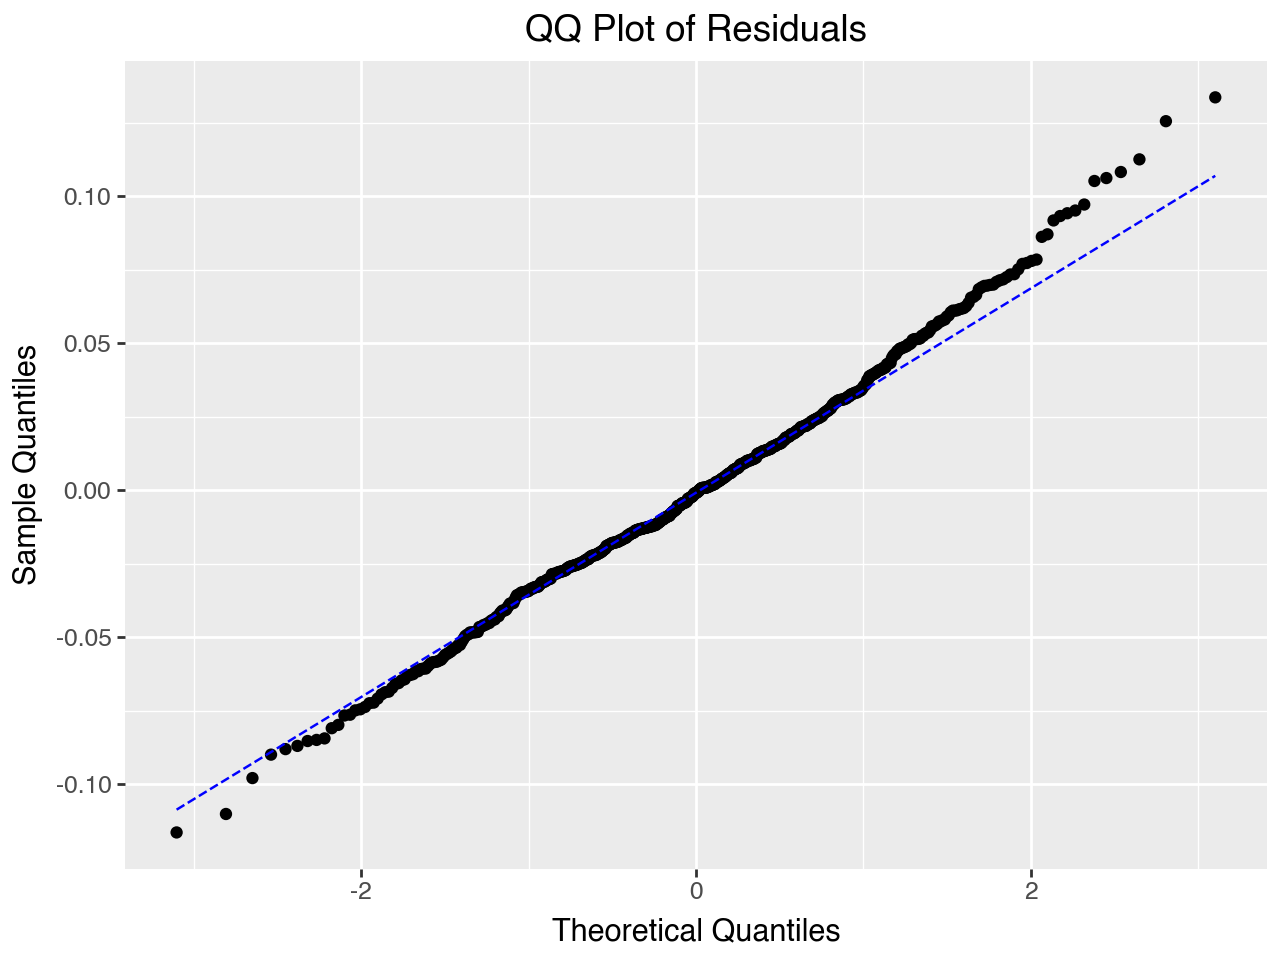

P-value is: 0.027780


In [6]:
#Checking Normality after accounting for Non-Normality with log transformation
validation['pred_mlr'] = model_mlr.predict()
validation['resid_mlr'] = model_mlr.resid

p = (
   ggplot(validation, aes(sample="resid_mlr")) +
   geom_qq() +
   geom_qq_line(color="blue", linetype="dashed") +
   labs(title="QQ Plot of Residuals", x="Theoretical Quantiles", y="Sample Quantiles")
)
p.show()

#Looks relatively Normal, but Leptokurtic

#Check Normality with Shapiro-Wilk Test
shap_test = sp.stats.shapiro(model_mlr.resid)
print(f"P-value is: {shap_test.pvalue:4f}")

#Still Not-Normal - accounted for and slightly improved p-value

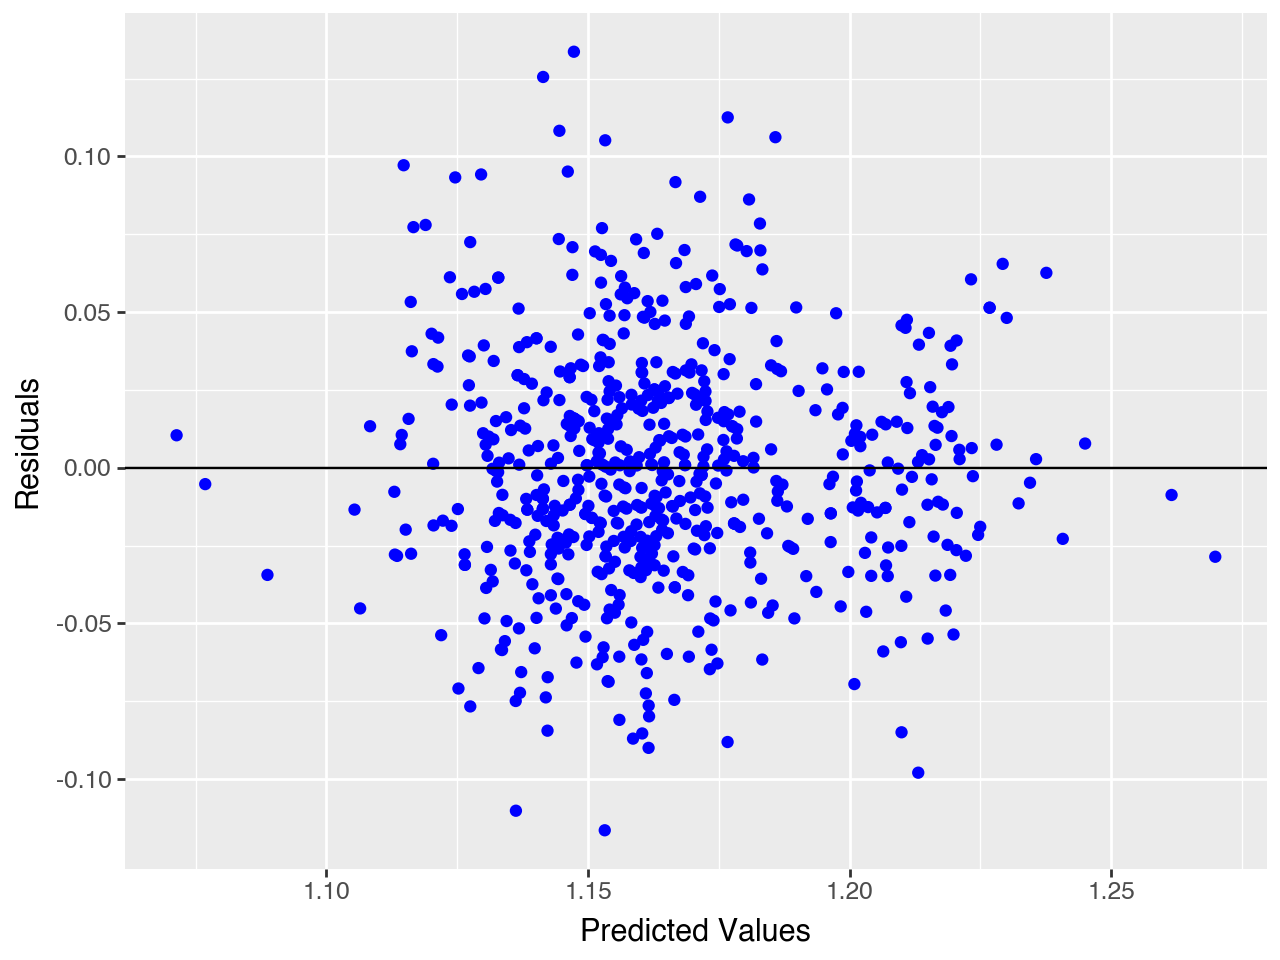

Spearman correlation: -0.08476266642604698
P-value: 0.03071367359196781


In [7]:
#Second Assumption - Checking for equality of variances 

#Plotting residuals with a scatterplot 
p=(ggplot(validation, aes(x="pred_mlr",y="resid_mlr")) +geom_point(color="blue") +
          geom_hline(yintercept = 0) + 
          labs(x="Predicted Values", y="Residuals")
         )

p.show()

#Not necessarily in any pattern and pretty random

#Can also check equal variances with Spearman's Rank Correlation
validation['abs_resid']=validation['resid_mlr'].abs()
correlation, p_value = spearmanr(validation['pred_mlr'], validation['abs_resid'])
print(f"Spearman correlation: {correlation}")
print(f"P-value: {p_value}")

#P-value less than 0.05 indicates there are unequal variances (not terrible though)

                            OLS Regression Results                            
Dep. Variable:                 log_pH   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     51.29
Date:                Mon, 22 Sep 2025   Prob (F-statistic):           4.54e-64
Time:                        15:16:54   Log-Likelihood:                 1208.6
No. Observations:                 650   AIC:                            -2399.
Df Residuals:                     641   BIC:                            -2359.
Df Model:                           8                                         
Covariance Type:                  HC1                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.3065 

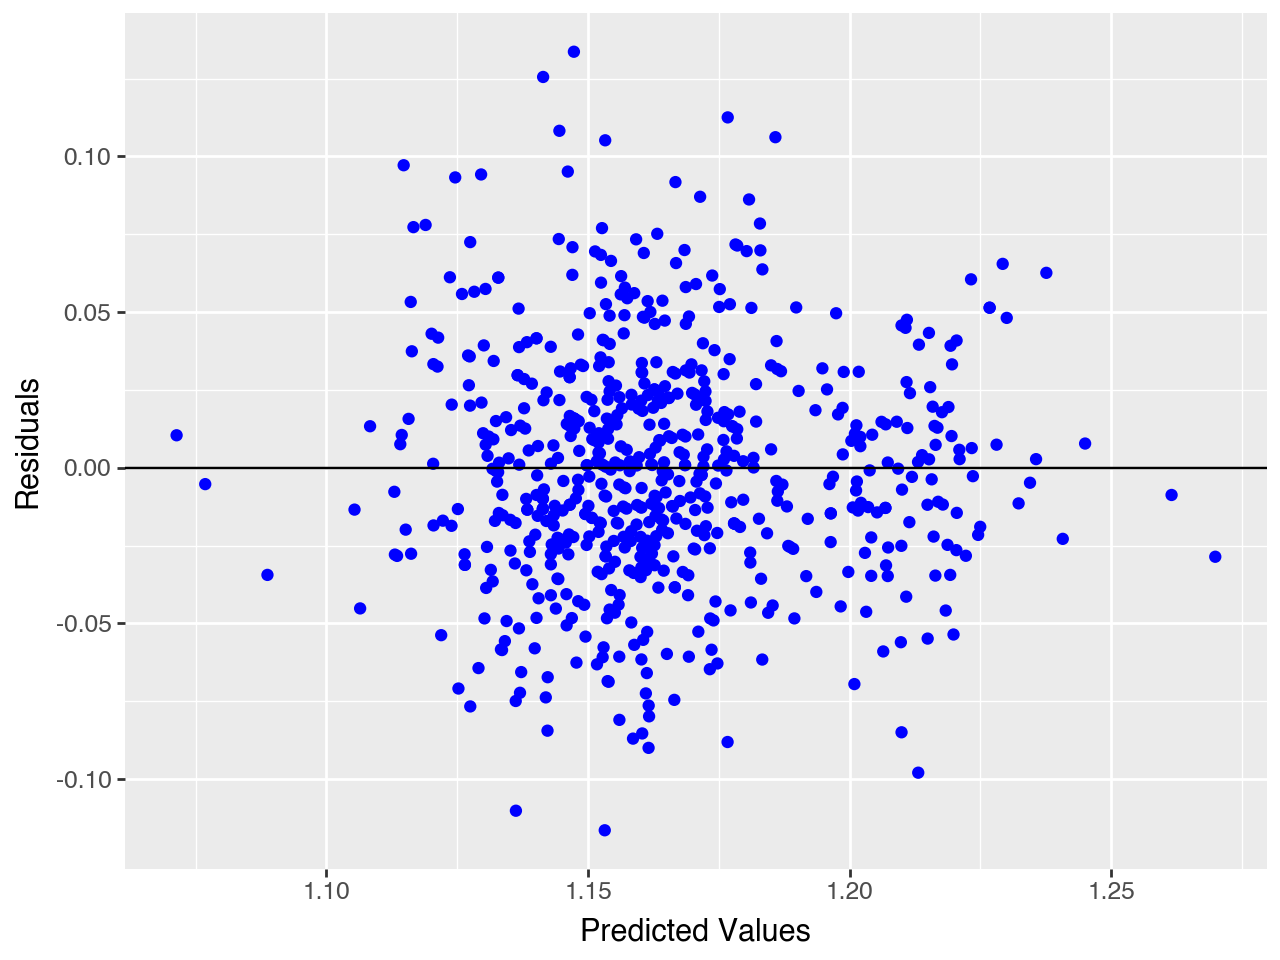

Spearman correlation: -0.08476266642604698
P-value: 0.03071367359196781


In [8]:
#Already have addressed with log transformation, but can apply robust standard errors as well 

#Applying robust standard errors to address unequal variances
robust_model = smf.ols(
    "log_pH ~ fixed_acidity + citric_acid + residual_sugar + chlorides + total_sulfur_dioxide + sulphates + alcohol + Wine_Type", 
    data = validation).fit(cov_type='HC1')
print(robust_model.summary())

#Plotting residuals after applying robust standard errors
validation['pred_mlr'] = robust_model.predict()
validation['resid_mlr'] = robust_model.resid

p=(ggplot(validation, aes(x="pred_mlr",y="resid_mlr")) +geom_point(color="blue") +
          geom_hline(yintercept = 0) + 
          labs(x="Predicted Values", y="Residuals")
         )

p.show()

#Checking homoscedasticity with a formal test (spearman rank)
validation['abs_resid']=validation['resid_mlr'].abs()
correlation, p_value = spearmanr(validation['pred_mlr'], validation['abs_resid'])
print(f"Spearman correlation: {correlation}")
print(f"P-value: {p_value}")

#Still heteroscedastic variance, but it has now been accounted for by log transoformation and robust standard errors